# Semana 17: Análisis de negocio 💼

## Métricas y Embudos 📒
En el análisis de negocios, usamos métricas clave para entender el desempeño de una empresa. Los embudos (funnels) nos ayudan a visualizar cómo los usuarios progresan en etapas sucesivas de un proceso, como una compra o una suscripción. Mediante este análisis, podemos identificar cuellos de botella y oportunidades de optimización.

### Ingreso, ganancias y rentabilidad de inversión (ROI) 💹
- El ingreso es el dinero recibido por ventas.
- La ganancia es lo que queda después de restar los costos.
- El ROI (Return on Investment) nos indica la eficiencia de una inversión: cuánto ganamos por cada unidad monetaria invertida.

In [1]:
import pandas as pd

data = pd.DataFrame({
    'cliente_id': [1, 2, 3, 4],
    'ingreso': [100, 250, 300, 400],
    'costo': [30, 100, 150, 250]
})

data['ganancia'] = data['ingreso'] - data['costo']
data['ROI'] = (data['ganancia'] / data['costo']) * 100

data

,cliente_id,ingreso,costo,ganancia,ROI
0,1,100,30,70,233.333333
1,2,250,100,150,150.000000
2,3,300,150,150,100.000000
3,4,400,250,150,60.000000


### Tasa de conversión 🧮
La tasa de conversión indica el porcentaje de usuarios que realizaron una acción deseada, como una compra, entre todos los que participaron en el proceso.

In [2]:
visitas = 1000
compras = 80

tasa_conversion = compras / visitas
print(f'Tasa de conversión: {tasa_conversion:.2%}')

Tasa de conversión: 8.00%


### Embudos de conversión 🧺
Un embudo muestra cómo se reduce el número de usuarios a medida que avanzan por diferentes etapas. Sirve para identificar dónde abandonan los usuarios.

In [3]:
embudo = pd.DataFrame({
    'etapa': ['Visita', 'Añadir al carrito', 'Checkout', 'Compra'],
    'usuarios': [1000, 400, 200, 80]
})

embudo['tasa_conversion_etapa'] = embudo['usuarios'] / embudo['usuarios'].iloc[0]

embudo

,etapa,usuarios,tasa_conversion_etapa
0,Visita,1000,1.00
1,Añadir al carrito,400,0.40
2,Checkout,200,0.20
3,Compra,80,0.08


### Embudo de marketing: impresiones, CTR y CR 🗂️

- **Impresiones:** Veces que se muestra un anuncio.
- **CTR (Click-Through Rate):** Porcentaje de impresiones que generan clics.
- **CR (Conversion Rate):** Porcentaje de clics que se convierten en conversiones (compras).

In [4]:
impresiones = 5000
clicks = 400
compras = 80

ctr = clicks / impresiones
cr = compras / clicks

print(f'CTR: {ctr:.2%}, CR: {cr:.2%}')

CTR: 8.00%, CR: 20.00%


### Agrupación por semanas y meses 🗄️
Agrupar por semana o mes ayuda a observar tendencias y patrones temporales en las métricas de negocio.

In [5]:
import numpy as np

df = pd.DataFrame({
    'fecha': pd.date_range(start='2024-01-01', periods=90, freq='D'),
    'ingresos': np.random.randint(50, 500, size=90)
})

df['semana'] = df['fecha'].dt.isocalendar().week
df['mes'] = df['fecha'].dt.month

df.groupby('semana')['ingresos'].sum()


semana
1     1122
2     1630
3     1912
4     1604
5     1966
6     2088
7     1903
8     1053
9     1401
10    2026
11    2073
12    1783
13    1105
Name: ingresos, dtype: int64

### Embudos de producto simples 🧶
Estos embudos representan el camino que sigue un usuario dentro de un producto, desde el registro hasta la conversión final.

In [6]:
etapas = ['registro', 'activación', 'uso', 'compra']
usuarios = [1000, 800, 500, 150]

embudo_producto = pd.DataFrame({'etapa': etapas, 'usuarios': usuarios})
embudo_producto['tasa'] = embudo_producto['usuarios'] / embudo_producto['usuarios'][0]

embudo_producto

,etapa,usuarios,tasa
0,registro,1000,1.00
1,activación,800,0.80
2,uso,500,0.50
3,compra,150,0.15


### Embudos con secuencia de eventos 🗓️
Al analizar eventos registrados por los usuarios (como "registro", "uso", "compra"), podemos reconstruir su recorrido y detectar comportamientos típicos o inusuales.

In [7]:
eventos = pd.DataFrame({
    'usuario_id': [1, 1, 1, 2, 2, 3, 3, 3],
    'evento': ['registro', 'activación', 'compra', 'registro', 'activación', 'registro', 'uso', 'compra'],
    'fecha': pd.to_datetime(['2024-01-01', '2024-01-02', '2024-01-05',
                             '2024-01-01', '2024-01-03',
                             '2024-01-02', '2024-01-03', '2024-01-07'])
})

pivot = eventos.pivot_table(index='usuario_id', columns='evento', aggfunc='size', fill_value=0)
pivot

evento,activación,compra,registro,uso
usuario_id,,,,
1,1,1,1,0
2,1,0,1,0
3,0,1,1,1


## Análisis de cohortes 📈
Una cohorte es un grupo de usuarios que comparten una característica común durante un periodo determinado, como la fecha de registro. El **análisis de cohortes** permite estudiar cómo se comportan esos grupos a lo largo del tiempo, lo cual es útil para entender la retención de usuarios, el valor de vida útil, entre otros indicadores clave.

\
Este análisis se basa en agrupar usuarios según su fecha de inicio (registro, primera compra, etc.) y luego observar su comportamiento en los meses siguientes. Nos permite responder preguntas como:

- ¿Qué tan bien retengo a los usuarios a lo largo del tiempo?
- ¿Qué cohortes tienen mejor rendimiento?

In [8]:
import pandas as pd
import numpy as np
from operator import attrgetter

# Crear datos de ejemplo
np.random.seed(42)
df = pd.DataFrame({
    'usuario_id': range(1, 101),
    'fecha_registro': pd.to_datetime(np.random.choice(pd.date_range('2024-01-01', '2024-03-31'), size=100)),
    'fecha_actividad': pd.to_datetime(np.random.choice(pd.date_range('2024-01-01', '2024-06-15'), size=100))
})

# Cohorte y mes de actividad
df['cohorte'] = df['fecha_registro'].dt.to_period('M')
df['mes_actividad'] = df['fecha_actividad'].dt.to_period('M')

# Diferencia en meses
df['meses_desde_registro'] = (df['mes_actividad'] - df['cohorte']).apply(attrgetter('n'))

# Tabla de cohortes
cohort_data = df.groupby(['cohorte', 'meses_desde_registro'])['usuario_id'].nunique().unstack(fill_value=0)

cohort_data

meses_desde_registro,-2,-1,0,1,2,3,4,5
cohorte,,,,,,,,
2024-01,0,0,7,4,3,4,9,4
2024-02,0,6,5,7,6,8,1,0
2024-03,5,6,9,9,5,2,0,0


### Evaluación de cambios en los valores absolutos por mes 🗓️
Nos ayuda a ver cuántos usuarios únicos permanecen activos en cada mes desde su registro.

### Evaluación de cambios en valores relativos por ciclo de vida 📝
Calculamos la retención dividiendo los usuarios activos cada mes entre los que comenzaron (mes 0). Esto nos permite comparar cohortes entre sí, independientemente del tamaño inicial.

In [9]:
retencion_relativa = cohort_data.divide(cohort_data.iloc[:, 0], axis=0)

retencion_relativa.round(2)

meses_desde_registro,-2,-1,0,1,2,3,4,5
cohorte,,,,,,,,
2024-01,NaN,NaN,inf,inf,inf,inf,inf,inf
2024-02,NaN,inf,inf,inf,inf,inf,inf,NaN
2024-03,1.0,1.2,1.8,1.8,1.0,0.4,0.0,0.0


### Visualización del análisis de cohortes 📊
Un heatmap es ideal para representar visualmente la retención a lo largo del tiempo.

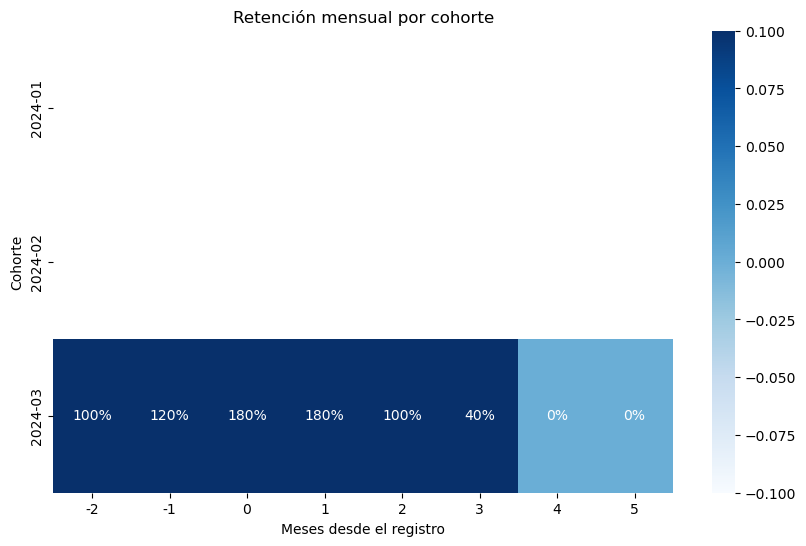

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(retencion_relativa, annot=True, fmt=".0%", cmap='Blues')
plt.title('Retención mensual por cohorte')
plt.xlabel('Meses desde el registro')
plt.ylabel('Cohorte')
plt.show()

### Tasa de retención y de cancelación ⚖️

- **Tasa de retención:** porcentaje de usuarios que siguen activos después de cierto tiempo.

- **Tasa de cancelación:** 1 - tasa de retención.

In [11]:
usuarios_inicio = 100
usuarios_dia30 = 65

retencion = usuarios_dia30 / usuarios_inicio
cancelacion = 1 - retencion

print(f'Retención: {retencion:.2%}, Cancelación: {cancelacion:.2%}')

Retención: 65.00%, Cancelación: 35.00%


### Cohortes comportamentales 📋
Agrupar cohortes por comportamiento (no solo por fecha) permite comparar usuarios según cómo interactúan con el producto: cantidad de eventos, uso de funciones, etc.

In [12]:
# Simular número de eventos realizados por usuario
df['num_eventos'] = np.random.randint(1, 20, size=len(df))

# Crear etiquetas de comportamiento
df['comportamiento'] = pd.cut(df['num_eventos'],
                              bins=[0, 5, 10, 20],
                              labels=['bajo', 'medio', 'alto'])

# Agrupar cohortes por comportamiento
cohortes_comportamiento = df.groupby(['cohorte', 'comportamiento'])['usuario_id'].count().unstack(fill_value=0)

cohortes_comportamiento

/tmp/ipykernel_11875/905888270.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cohortes_comportamiento = df.groupby(['cohorte', 'comportamiento'])['usuario_id'].count().unstack(fill_value=0)


comportamiento,bajo,medio,alto
cohorte,,,
2024-01,16,5,10
2024-02,14,9,10
2024-03,7,9,20


## 💻📖 Pongamos a prueba nuestro conocimiento
Para el siguiente ejercicio seguimos las instrucciones del siguiente [link](https://colab.research.google.com/drive/15xXfDkHPmp5v7T-RGWXFcM0v2CopD9B9?usp=sharing)